In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
x = np.arange(10).reshape(-1,1) #data
y = np.array([0,0,0,0,0,1,1,1,1,1]) #fitur

In [8]:
x,y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [5]:
model =  LogisticRegression()

In [9]:
model.fit(x,y) #traning

LogisticRegression()

In [10]:
model.classes_

array([0, 1])

In [11]:
print("slope : ",model.coef_)
print("Intercept : ",model.intercept_)

slope :  [[1.18606347]]
Intercept :  [-5.3373512]


In [12]:
model.predict_proba(x)

array([[0.99521442, 0.00478558],
       [0.98449991, 0.01550009],
       [0.95097812, 0.04902188],
       [0.85559321, 0.14440679],
       [0.6440755 , 0.3559245 ],
       [0.35595457, 0.64404543],
       [0.144423  , 0.855577  ],
       [0.049028  , 0.950972  ],
       [0.0155021 , 0.9844979 ],
       [0.0047862 , 0.9952138 ]])

In [14]:
model.predict(x)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [62]:
import numpy as np
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y


In [63]:
X,y =get_xor()

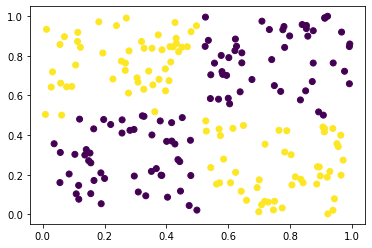

In [64]:
plt.scatter(X[:,0],X[:,1],c=y);

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

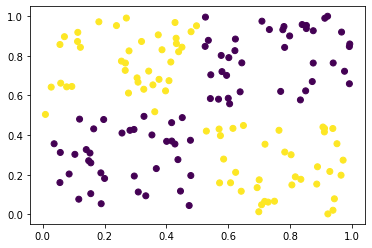

In [66]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train);

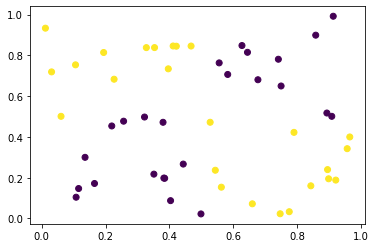

In [67]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test);

## Persiapan Model

In [68]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred =  model.predict(X_test)

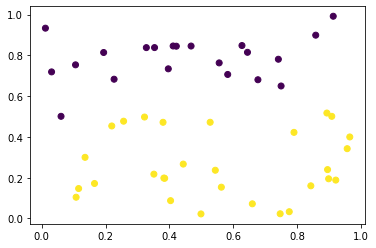

In [70]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred);

In [71]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.36      0.43      0.39        21
           1       0.52      0.45      0.48        29

    accuracy                           0.44        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.45      0.44      0.44        50



In [72]:
print(confusion_matrix(y_pred,y_test))

[[ 9 12]
 [16 13]]


In [73]:
print(y_pred)
print(y_test)

[0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 1]
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 1 1]


In [74]:
#k-nn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred =  model.predict(X_test)

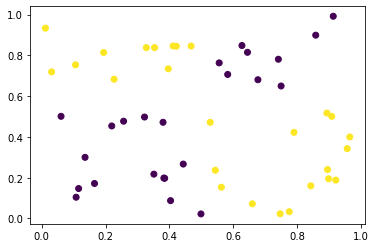

In [76]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred);

In [77]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.92      0.94        26

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [78]:
from sklearn.datasets import load_digits

In [79]:
digits = load_digits()

In [80]:
X,y = digits.data, digits.target

In [81]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

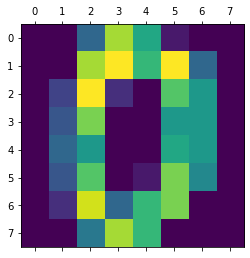

In [83]:
plt.matshow(X[0].reshape(8,8));

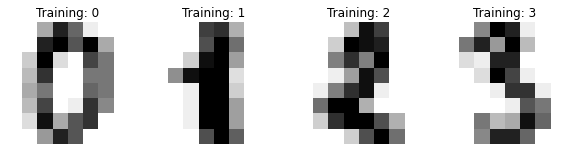

In [87]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [90]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [91]:
y_pred =  model.predict(X_test)

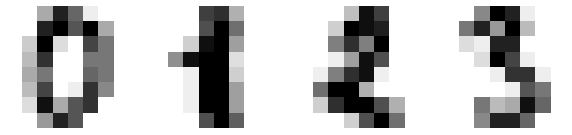

In [93]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, digits.images, y_pred):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [94]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.97      0.98        58
           2       1.00      1.00      1.00        43
           3       1.00      0.97      0.99        40
           4       0.93      1.00      0.96        39
           5       0.98      0.95      0.96        43
           6       0.98      1.00      0.99        44
           7       1.00      0.96      0.98        46
           8       0.98      0.98      0.98        51
           9       0.94      0.98      0.96        49

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [97]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred));

Accuracy:  0.98
